# Moscow Car Prices

Импортируем необходимые библиотеки

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные

In [79]:
df = pd.read_csv('all_auto_ru_09_09_2020.csv')

Выводим первые 5 строк датасета

In [80]:
df.head()

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,Руль,Состояние,Владельцы,ПТС,Таможня,Владение,price,start_date,hidden,model
0,Седан,AUDI,040001,бензин,1990.0,2.8 MT (174 л.с.) 4WD,4.0,1991,SEDAN MECHANICAL 2.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,200000.0,2019-10-03T08:09:11Z,NaN,100
1,Седан,AUDI,EE1D19,бензин,1982.0,1.8 MT (90 л.с.),4.0,1986,SEDAN MECHANICAL 1.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,60000.0,2020-09-06T06:49:40Z,NaN,100
2,Универсал 5 дв.,AUDI,0000CC,бензин,1988.0,2.3 MT (136 л.с.) 4WD,5.0,1989,WAGON_5_DOORS MECHANICAL 2.3,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,99000.0,2020-09-02T14:04:21Z,NaN,100
3,Седан,AUDI,CACECB,бензин,1988.0,1.8 MT (90 л.с.),4.0,1989,SEDAN MECHANICAL 1.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,65000.0,2020-08-23T17:40:09Z,NaN,100
4,Седан,AUDI,040001,бензин,1990.0,2.0 MT (101 л.с.),4.0,1991,SEDAN MECHANICAL 2.0,MECHANICAL,...,LEFT,NaN,3.0,DUPLICATE,True,NaN,100000.0,2020-09-08T09:22:07Z,NaN,100


Выводим размер датасета

In [81]:
df.shape

(89378, 26)

Выводим общую информацию по всем столбцам датасета

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89378 entries, 0 to 89377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              89377 non-null  object 
 1   brand                 89378 non-null  object 
 2   color                 89378 non-null  object 
 3   fuelType              89378 non-null  object 
 4   modelDate             89377 non-null  float64
 5   name                  89377 non-null  object 
 6   numberOfDoors         89377 non-null  float64
 7   productionDate        89378 non-null  int64  
 8   vehicleConfiguration  89377 non-null  object 
 9   vehicleTransmission   89377 non-null  object 
 10  engineDisplacement    89377 non-null  object 
 11  enginePower           89377 non-null  float64
 12  description           86124 non-null  object 
 13  mileage               89378 non-null  int64  
 14  Комплектация          89378 non-null  object 
 15  Привод             

Видно, что датасет имеет объекты NaN. Выведем тепловую карту пропусков

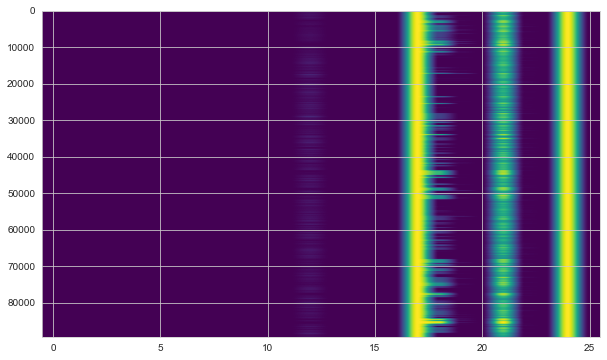

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(df.isna(), cmap='viridis', aspect='auto')

plt.show()

## Проанализируем каждый столбец

### Столбцы 'Состояние', 'hidden'

In [84]:
print("Количество NaN элементов в столбце 'hidden':",df['hidden'].isna().sum(), "из 89378")
print("Количество NaN элементов в столбце 'Состояние':",df['Состояние'].isna().sum(), "из 89378")

Количество NaN элементов в столбце 'hidden': 89378 из 89378
Количество NaN элементов в столбце 'Состояние': 89378 из 89378


Так как столбцы 'Состояние' и 'hidden' имеют все пропущенные элементы, то очевидно, что они не несут никакой полезной информации. Удалим эти столбцы.

In [85]:
df = df.drop(columns=['Состояние', 'hidden'])

### Столбец 'bodyType'

Данный столбец содержит информацию о типе кузова автомобилей

In [86]:
df['bodyType']

0                  Седан
1                  Седан
2        Универсал 5 дв.
3                  Седан
4                  Седан
              ...       
89373            Минивэн
89374            Минивэн
89375            Минивэн
89376            Минивэн
89377            Минивэн
Name: bodyType, Length: 89378, dtype: object

Проверим на наличие пропусков

In [87]:
df['bodyType'].isna().sum()

1

Удалим строку с пропуском

In [88]:
df = df.dropna(subset=['bodyType'])

Выведем все уникальные значения этого столбца

In [89]:
df['bodyType'].unique()

array(['Седан', 'Универсал 5 дв.', 'Хэтчбек 5 дв. Sportback',
       'Хэтчбек 3 дв.', 'Хэтчбек 5 дв.', 'Кабриолет', 'Купе',
       'Лифтбек Sportback', 'Лифтбек', 'Седан Long', 'Внедорожник 5 дв.',
       'Кабриолет Roadster', 'Седан 2 дв.', 'Седан Gran Coupe',
       'Компактвэн', 'Компактвэн Gran Tourer', 'Лифтбек Gran Turismo',
       'Хэтчбек 3 дв. Compact', 'Лифтбек Gran Coupe', 'Купе-хардтоп',
       'Родстер Roadster', 'Родстер', 'Внедорожник 5 дв. ESV', 'Минивэн',
       'Пикап Двойная кабина', 'Внедорожник 3 дв.',
       'Пикап Одинарная кабина', 'Тарга', 'Пикап Двойная кабина Crew Cab',
       'Пикап Двойная кабина Double',
       'Пикап Одинарная кабина Regular Cab', 'Внедорожник 5 дв. EXT',
       'Седан SRT8', 'Минивэн SWB', 'Минивэн Grand', 'Компактвэн Grand',
       'Универсал 5 дв. CrossTourer', 'Минивэн Long', 'Минивэн XL',
       'Микровэн Coach', 'Хэтчбек 5 дв. Best', 'Хэтчбек 5 дв. SRT4',
       'Купе SRT', 'Седан SRT', 'Пикап Полуторная кабина',
       'Пикап Двойн

Видно, что большинство видов кузова имеют специфичные названия. Однако стоит отметить, что первое слово каждого из этих значений несет наибольшую информацию. Удалим все слова, кроме первого, чтобы упростить этот столбец. Это поможет нам при обучении

In [90]:
df['bodyType'] = df['bodyType'].str.split().str[0]

Выведем новые уникальные значения

In [91]:
df['bodyType'].unique()

array(['Седан', 'Универсал', 'Хэтчбек', 'Кабриолет', 'Купе', 'Лифтбек',
       'Внедорожник', 'Компактвэн', 'Купе-хардтоп', 'Родстер', 'Минивэн',
       'Пикап', 'Тарга', 'Микровэн', 'Фастбек', 'Седан-хардтоп', 'Фургон',
       'Лимузин'], dtype=object)

Видно, что теперь он содержит более конкретную информацию о кузове автомобиля

### Столбец 'brand'

Данный столбец содержит информацию о марках автомобилей

In [92]:
df['brand']

0              AUDI
1              AUDI
2              AUDI
3              AUDI
4              AUDI
            ...    
89373    SSANG_YONG
89374    SSANG_YONG
89375    SSANG_YONG
89376    SSANG_YONG
89377    SSANG_YONG
Name: brand, Length: 89377, dtype: object

Выведем количество значений NaN

In [93]:
df['brand'].isna().sum() 

0

Выведем количество уникальных значений для этого столбца

In [94]:
df['brand'].nunique()

36

Выведем все уникальные значения этого столбца

In [95]:
df['brand'].unique()

array(['AUDI', 'BMW', 'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'DAEWOO', 'DODGE', 'FORD', 'GEELY', 'HONDA', 'HYUNDAI',
       'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LEXUS', 'MAZDA', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'SKODA', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'GREAT_WALL', 'LAND_ROVER', 'MERCEDES', 'SSANG_YONG'], dtype=object)

### Столбец 'color'

Данный столбец содержит информацию о цвете автомобилей

In [96]:
df['color']

0        040001
1        EE1D19
2        0000CC
3        CACECB
4        040001
          ...  
89373    040001
89374    CACECB
89375    040001
89376    97948F
89377    FAFBFB
Name: color, Length: 89377, dtype: object

Выведем количество значений NaN

In [97]:
df['color'].isna().sum()

0

Выведем все уникальные значения этого столбца

In [98]:
df['color'].unique()

array(['040001', 'EE1D19', '0000CC', 'CACECB', '007F00', 'FAFBFB',
       '97948F', '22A0F8', '660099', '200204', 'C49648', 'DEA522',
       '4A2197', 'FFD600', 'FF8649', 'FFC0CB'], dtype=object)

### Столбец 'fuelType'

Данный столбец содержит информацию о типе топлива автомобилей

In [99]:
df['fuelType']

0        бензин
1        бензин
2        бензин
3        бензин
4        бензин
          ...  
89373    дизель
89374    дизель
89375    дизель
89376    дизель
89377    дизель
Name: fuelType, Length: 89377, dtype: object

Выведем количество значений NaN

In [100]:
df['fuelType'].isna().sum()

0

Выведем все уникальные значения этого столбца

In [101]:
df['fuelType'].unique()

array(['бензин', 'дизель', 'электро', 'гибрид', 'газ'], dtype=object)

### Столбец 'modelDate'

Данный столбец содержит информацию о годе каждой модели

In [102]:
df['modelDate']

0        1990.0
1        1982.0
2        1988.0
3        1988.0
4        1990.0
          ...  
89373    2004.0
89374    2004.0
89375    2013.0
89376    2013.0
89377    2013.0
Name: modelDate, Length: 89377, dtype: float64

Выведем количество значений NaN

In [103]:
df['modelDate'].isna().sum()

0

Выведем количество уникальных значений для этого столбца

In [104]:
df['modelDate'].nunique()

78

Построем график распределения даты выпуска автомобилей

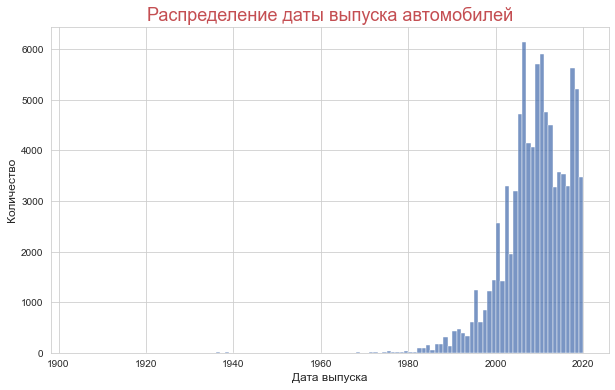

In [105]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['modelDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Удалим выбросы из данного столбца

In [106]:
mean = np.log(df['modelDate']).mean()
std = np.log(df['modelDate']).std()

# определяем выбросы
lower_bound = np.exp(mean - 3 * std)
upper_bound = np.exp(mean + 3 * std)

print(lower_bound, upper_bound)

1986.3535477498792 2030.953153540733


Выведем количество строк, которые будем удалять

In [107]:
df.loc[df['modelDate'] > lower_bound].shape[0]

88543

Удалим строки

In [108]:
df = df.loc[df['modelDate'] > lower_bound]

Новое количество строк

In [109]:
df.shape[0]

88543

Построим график распределения дат с новыми данными

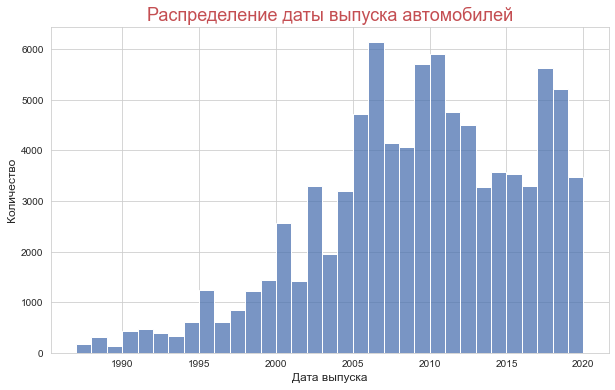

In [110]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['modelDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'name'

Данный столбец содержит информацию о названии автомобилей

In [111]:
df['name']

0         2.8 MT (174 л.с.) 4WD
2         2.3 MT (136 л.с.) 4WD
3              1.8 MT (90 л.с.)
4             2.0 MT (101 л.с.)
5             2.8 MT (174 л.с.)
                  ...          
89373    2.7d AT (163 л.с.) 4WD
89374    2.7d AT (163 л.с.) 4WD
89375    2.0d AT (149 л.с.) 4WD
89376    2.0d AT (149 л.с.) 4WD
89377    2.0d AT (149 л.с.) 4WD
Name: name, Length: 88543, dtype: object

Выведем количество значений NaN

In [112]:
df['name'].isna().sum()

0

Выведем количество уникальных значений для этого столбца

In [113]:
df['name'].nunique()

4201

### Столбец 'numberOfDoors'

Данный столбец содержит информацию о количестве дверей автомобилей

In [114]:
df['numberOfDoors']

0        4.0
2        5.0
3        4.0
4        4.0
5        4.0
        ... 
89373    5.0
89374    5.0
89375    5.0
89376    5.0
89377    5.0
Name: numberOfDoors, Length: 88543, dtype: float64

Выведем количество значений NaN

In [115]:
df['numberOfDoors'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [116]:
df['numberOfDoors'].unique()

array([4., 5., 3., 2.])

### Столбец 'productionDate'

Данный столбец содержит информацию о дате выпуска автомобилей

In [117]:
df['productionDate']

0        1991
2        1989
3        1989
4        1991
5        1993
         ... 
89373    2006
89374    2007
89375    2014
89376    2013
89377    2014
Name: productionDate, Length: 88543, dtype: int64

Выведем количество значений NaN

In [118]:
df['productionDate'].isna().sum()

0

Построим график распределения даты выпуска автомобилей

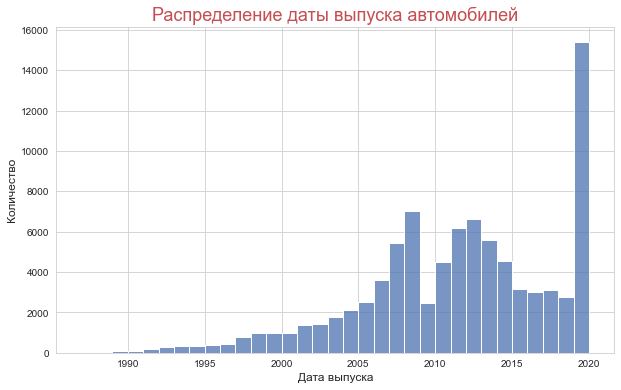

In [119]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['productionDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'vehicleTransmission'

Данный столбец содержит информацию о коробке передач автомобилей

In [120]:
df['vehicleTransmission']

0        MECHANICAL
2        MECHANICAL
3        MECHANICAL
4        MECHANICAL
5        MECHANICAL
            ...    
89373     AUTOMATIC
89374     AUTOMATIC
89375     AUTOMATIC
89376     AUTOMATIC
89377     AUTOMATIC
Name: vehicleTransmission, Length: 88543, dtype: object

Выведем количество значения NaN для данного столбца

In [121]:
df['vehicleTransmission'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [122]:
df['vehicleTransmission'].unique()

array(['MECHANICAL', 'AUTOMATIC', 'ROBOT', 'VARIATOR'], dtype=object)

### Столбец 'engineDisplacement'

Данный столбец содержит информацию о вместимости двигателей автомобилей

In [123]:
df['engineDisplacement']

0         2.8
2         2.3
3         1.8
4         2.0
5         2.8
         ... 
89373    2.7d
89374    2.7d
89375    2.0d
89376    2.0d
89377    2.0d
Name: engineDisplacement, Length: 88543, dtype: object

Выведем количество значений NaN

In [124]:
df['engineDisplacement'].isna().sum()

0

Выдедем количество уникальных значений для данного столбца

In [125]:
df['engineDisplacement'].nunique()

518

Выведем все уникальные значения для данного столбца

In [126]:
df['engineDisplacement'].unique()

array(['2.8', '2.3', '1.8', '2.0', '2.6', '2.2', 'S4', '2.5d', '1.9d',
       '1.6', '1.4', '1.2d', 'ultra', '1.2', '3.2', '1.5', '2.0d', '8V',
       '3.1', '2.4', '16V', '3.0d', '2.7d', '3.0', '7S-tronic',
       'tiptronic', '40', '45', '55', '2.7', '4.2', 'S-tronic',
       'Tiptronic', 'Long', '4.0', '60', '3.9d', '6.0', '3.7', '4.1d',
       '35', '8tiptronic', 'clean', '2.0hyb', '3.6', '5.9d', 'V10', 'V8',
       '2.5', '2.9', '5.0', '5.2', 'M135i', '116i', '120i', '118i',
       '135i', 'M140i', '125i', '120d', '130i', '118d', '218i', '220i',
       '220d', 'M235i', '218d', '216d', '335i', '320i', '318i', '318d',
       '320d', '316i', '328i', '330i', '325xi', '325i', '330d', '323i',
       '340i', '335d', '335xi', '330xi', 'N46', '420d', '428i', '420i',
       '435i', '430i', '440i', '520d', '530d', '525i', '523i', '520i',
       '530i', '525d', '528i', '550i', '535d', 'M550i', 'M550d', '540i',
       '535i', '530xi', '530Li', '525xi', '520Li', '528Li', '535xi',
       '545i',

### Столбец 'enginePower'

Данный столбец содержит информацию о мощности автомобилей

In [127]:
df['enginePower']

0        174.0
2        136.0
3         90.0
4        101.0
5        174.0
         ...  
89373    163.0
89374    163.0
89375    149.0
89376    149.0
89377    149.0
Name: enginePower, Length: 88543, dtype: float64

Выведем количество значений NaN

In [128]:
df['enginePower'].isna().sum()

0

Построем график распределения мощности автомобилей

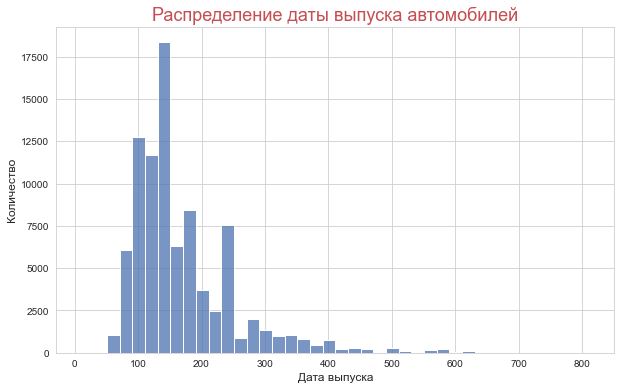

In [129]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['enginePower'], ax=ax, kde=False, color='#4c72b0', binwidth=20)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Найдем и удалим выбросы

In [130]:
# вычисляем межквартильный размах
q1 = np.log(df['enginePower']).quantile(0.25)
q3 = np.log(df['enginePower']).quantile(0.75)
iqr = q3 - q1

# определяем выбросы
lower_bound = np.exp(q1 - 1.5 * iqr)
upper_bound = np.exp(q3 + 1.5 * iqr)

print(lower_bound, upper_bound)

50.520191286213304 452.9872001146838


Выведем количество строк с выбросами

In [131]:
df.loc[df['enginePower'] > upper_bound].shape[0]

1237

Удалим выбросы

In [132]:
df = df.loc[df['enginePower'] < upper_bound]

In [133]:
df.shape[0]

87306

Построем новый график распределния мощности

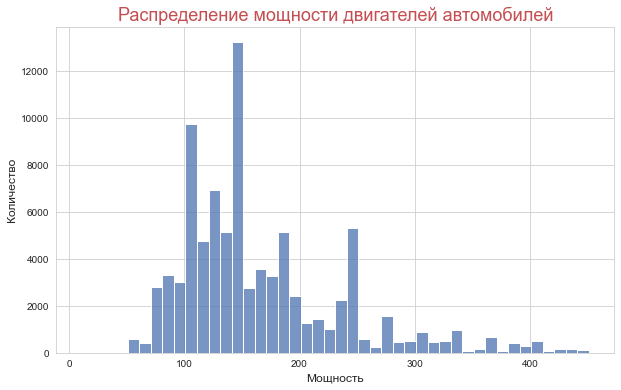

In [134]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['enginePower'], ax=ax, kde=False, color='#4c72b0', binwidth=10)
ax.set_xlabel('Мощность', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение мощности двигателей автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'description'

Данный столбец содержит информацию о описании автомобилей из объявлений

In [135]:
df['description']

0         Машина  в приличном состоянии ,не гнилая не р...
2        ПТС Оригинал!\nПолный комплект ключей!\nПо рез...
3                                                      NaN
4        Машина не гнилая, дыр нет, днище целое, даже в...
5        Хорошая комплектация: климат, эл. стекла, эл. ...
                               ...                        
89373    СВЕТИТ КРУТИТ РАБОТАЕТ ВСЁ.  БЕЗ ТОРГА .В МОСК...
89374    Автомобиль на ходу, каждый день в движении.\nС...
89375    Автомобиль куплен в декабре 2015 г., новым. Вс...
89376    Продаю семейного любимца. Большой вместительны...
89377    Авто в отличном состоянии всё работает. Большо...
Name: description, Length: 87306, dtype: object

Выведем количество значений NaN

In [136]:
df['description'].isna().sum()

3183

Так как зачастую цена автомобиля зависит от полноты его описания, введем новый столбец куда включим количество символов в описании

In [137]:
df['description_len'] = df['description'].str.len()

Пропуски заполним нулем

In [138]:
df['description_len'] = df['description_len'].fillna(0)

Построем график распределения количества символов в описании

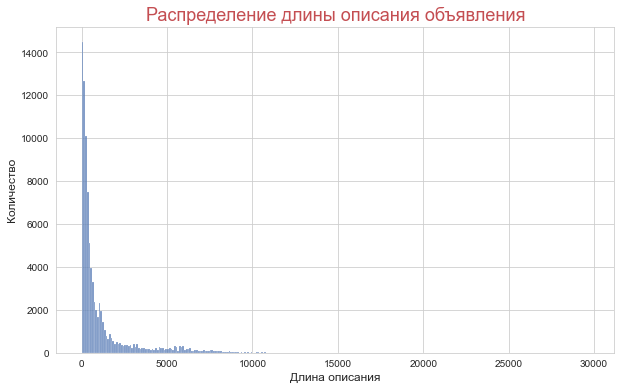

In [139]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['description_len'], ax=ax, kde=False, color='#4c72b0', binwidth=100)
ax.set_xlabel('Длина описания', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение длины описания объявления', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Посчитаем кожффициент корреляции для этого столбца и цены

In [140]:
np.corrcoef(df['description_len'], df['price'])[0, 1]

nan

### Столбец 'mileage'

Данный столбец содержит информацию о пробеге автомобилей

In [141]:
df['mileage']

0        350000
2        230000
3        240000
4        300000
5        200000
          ...  
89373    260000
89374    300000
89375    126000
89376     84000
89377    144000
Name: mileage, Length: 87306, dtype: int64

Выведем количество значений NaN

In [142]:
df['mileage'].isna().sum()

0

Построем график распределения пробега автомобилей

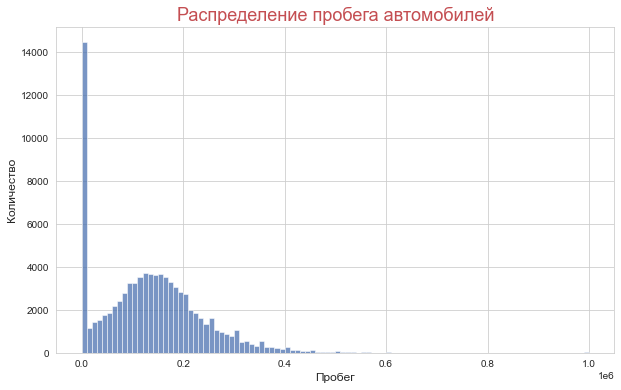

In [143]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['mileage'], ax=ax, kde=False, color='#4c72b0', binwidth=10000)
ax.set_xlabel('Пробег', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение пробега автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Видно, что большое количество объявлений имеет пробег 0

### Столбец 'Комплектация'

Данный столбец содержит информацию о комплектации автомобилей

In [144]:
df['Комплектация']

0                                              {'id': '0'}
2                                              {'id': '0'}
3                                              {'id': '0'}
4                                              {'id': '0'}
5                                              {'id': '0'}
                               ...                        
89373                                          {'id': '0'}
89374                                          {'id': '0'}
89375    {'id': '10408082', 'name': 'Luxury', 'availabl...
89376    {'id': '10408081', 'name': 'Elegance', 'availa...
89377                                          {'id': '0'}
Name: Комплектация, Length: 87306, dtype: object

Выведем количество значений NaN

In [145]:
df['Комплектация'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [146]:
df['Комплектация'].unique()

array(["{'id': '0'}",
       "{'id': '20717199', 'name': 'Basis', 'available_options': ['sport-seats', 'multi-wheel', 'heated-wash-system', 'airbag-passenger', 'lock', 'door-sill-panel', 'electro-mirrors', 'mirrors-heat', 'start-stop-function', 'computer', 'seat-transformation', 'wheel-power', 'fabric-seats', 'airbag-side', 'abs', 'wheel-leather', 'climate-control-1', 'esp', 'audiopreparation', 'front-centre-armrest', 'electro-window-back', '16-inch-wheels', 'condition', 'airbag-driver', 'isofix', 'electro-window-front', 'light-sensor', 'airbag-curtain', 'leather-gear-stick', 'rain-sensor', 'tyre-pressure', 'audiosystem-cd', 'front-seats-heat', 'wheel-configuration2', 'wheel-configuration1', 'immo', '12v-socket', 'third-rear-headrest'], 'vendor_colors': [{'body_color_id': 20617588, 'mark_color_id': 21386826, 'name_ru': 'Mythos black', 'hex_codes': ['010101'], 'color_type': 'METALLIC', 'stock_color': {'hex_code': '040001', 'name_ru': 'черный'}, 'photos': [{'name': '34-front', 'sizes': {

Интерпретировать данный столбец тяжело из-за большого количества информации в нем. Однако можно предположить, что длина строки может влиять на цену, так как чем выше параметры комплектации, тем дороже автомобиль. Введем новый столбец с длиной словаря каждой строки

In [196]:
df['equipment'] = df['Комплектация'].apply(eval).apply(len)

In [197]:
df['equipment']

0        1
2        1
3        1
4        1
5        1
        ..
89373    1
89374    1
89375    4
89376    4
89377    1
Name: equipment, Length: 86841, dtype: int64

Поситаем коэффициент корреляции нового столбца и цены

In [149]:
np.corrcoef(df['Complectation'], df['price'])[0, 1]

nan

### Столбец 'Привод'

Данный столбец содержит информацию о приводе автомобилей

In [150]:
df['Привод']

0          полный
2          полный
3        передний
4        передний
5        передний
           ...   
89373      полный
89374      полный
89375      полный
89376      полный
89377      полный
Name: Привод, Length: 87306, dtype: object

Выведем количество значений NaN

In [151]:
df['Привод'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [152]:
df['Привод'].unique()

array(['полный', 'передний', 'задний'], dtype=object)

### Столбец 'Руль'

Данный столбец содержит информацию о расположении руля автомобилей

In [153]:
df['Руль']

0        LEFT
2        LEFT
3        LEFT
4        LEFT
5        LEFT
         ... 
89373    LEFT
89374    LEFT
89375    LEFT
89376    LEFT
89377    LEFT
Name: Руль, Length: 87306, dtype: object

Выведем количество значений NaN

In [154]:
df['Руль'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [155]:
df['Руль'].unique()

array(['LEFT', 'RIGHT'], dtype=object)

### Столбец 'Владельцы'

Данный столбец содержит информацию о количесвте владельцев автомобилей

In [156]:
df['Владельцы']

0        3.0
2        3.0
3        3.0
4        3.0
5        3.0
        ... 
89373    3.0
89374    3.0
89375    1.0
89376    3.0
89377    2.0
Name: Владельцы, Length: 87306, dtype: float64

Выведем количество значений NaN

In [157]:
df['Владельцы'].isna().sum()

13345

Видно, что большое количество имеет значения NaN

In [158]:
df[df['Владельцы'].isna()].head()

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,Руль,Владельцы,ПТС,Таможня,Владение,price,start_date,model,description_len,Complectation
332,Седан,AUDI,97948F,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-10T18:16:24Z,A3,2818.0,4
333,Седан,AUDI,CACECB,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-10T18:16:24Z,A3,2818.0,4
336,Седан,AUDI,0000CC,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-04T16:44:36Z,A3,2643.0,4
339,Седан,AUDI,0000CC,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,2016000.0,2020-08-01T03:19:03Z,A3,6295.0,4
342,Седан,AUDI,97948F,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1946000.0,2020-08-01T03:19:03Z,A3,5943.0,4


Выведем количество автомобилей для каждого года выпуска, которые имеют значения NaN

In [159]:
for i in df[df['Владельцы'].isna()]['productionDate'].unique():
    print('Количество автомобилей без указания количества владельцев для автомобилей {} года:'.format(i), df.loc[((df['Владельцы'].isna()) & (df['productionDate'] == i))].shape[0])

Количество автомобилей без указания количества владельцев для автомобилей 2020 года: 12119
Количество автомобилей без указания количества владельцев для автомобилей 2019 года: 1151
Количество автомобилей без указания количества владельцев для автомобилей 2018 года: 74
Количество автомобилей без указания количества владельцев для автомобилей 2017 года: 1


Видно, что такие значения имеют новые автомобили. Учитывая это, мы можеи предположить, что эти автомобили никогда не имели владельцев и заменим пропуски нулями

In [160]:
df['Владельцы'] = df['Владельцы'].fillna(0)

In [161]:
df['Владельцы'].isna().sum()

0

Построем график распределения для количесвта владельцев автомобилей

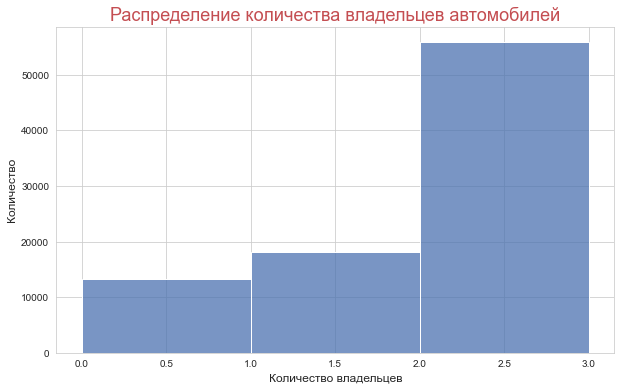

In [162]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['Владельцы'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Количество владельцев', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение количества владельцев автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'ПТС'

Данный столбец содержит информацию о ПТС автомобилей

In [163]:
df['ПТС']

0         ORIGINAL
2         ORIGINAL
3         ORIGINAL
4        DUPLICATE
5         ORIGINAL
           ...    
89373     ORIGINAL
89374     ORIGINAL
89375     ORIGINAL
89376     ORIGINAL
89377     ORIGINAL
Name: ПТС, Length: 87306, dtype: object

Выведем количество значений NaN

In [164]:
df['ПТС'].isna().sum()

345

Так как данный столбец имеет маленькое количество пропусков, то мы можем заменить его на моду без вреда для датасета

In [165]:
df['ПТС'] = df['ПТС'].fillna(0)

In [166]:
df['ПТС'].isna().sum()

0

Выведем уникальные значения для данного столбца

In [167]:
df['ПТС'].unique()

array(['ORIGINAL', 'DUPLICATE', 0], dtype=object)

### Столбец 'Таможня'

Данный столбец содержит информацию о растоможенности автомобилей

In [168]:
df['Таможня']

0        True
2        True
3        True
4        True
5        True
         ... 
89373    True
89374    True
89375    True
89376    True
89377    True
Name: Таможня, Length: 87306, dtype: bool

Выведем количество значений NaN

In [169]:
df['Таможня'].isna().sum()

0

Выведем количество уникальных значений для данного столбца

In [170]:
df['Таможня'].nunique()

1

Данный столбец имеет одно уникальное значение и ни одного пропуска. Это означает, что значения столбца одинаковы для всех строк, следовательно, не имеет никакого столбец не имеет никакого смысла. Удалим его

In [171]:
df = df.drop(columns=['Таможня'])

### Столбец 'Владение'

Данный столбец содержит информацию о дате начала владения автомобилей

In [172]:
df['Владение']

0                                NaN
2                                NaN
3                                NaN
4                                NaN
5                                NaN
                    ...             
89373                            NaN
89374     {'year': 2017, 'month': 2}
89375    {'year': 2015, 'month': 12}
89376    {'year': 2017, 'month': 10}
89377     {'year': 2018, 'month': 6}
Name: Владение, Length: 87306, dtype: object

Выведем количество значений NaN

In [173]:
df['Владение'].isna().sum()

58736

### Столбец 'price'

Данный столбец содержит информацию о цене автомобилей

In [174]:
df['price']

0         200000.0
2          99000.0
3          65000.0
4         100000.0
5          90000.0
           ...    
89373     450000.0
89374     485000.0
89375    1090000.0
89376    1180000.0
89377    1075000.0
Name: price, Length: 87306, dtype: float64

Выведем количество значений NaN

In [175]:
df['price'].isna().sum()

401

Удалим пропуски

In [176]:
df = df.dropna(subset=['price'])

In [177]:
df['price'].isna().sum()

0

Построем график распределения цены

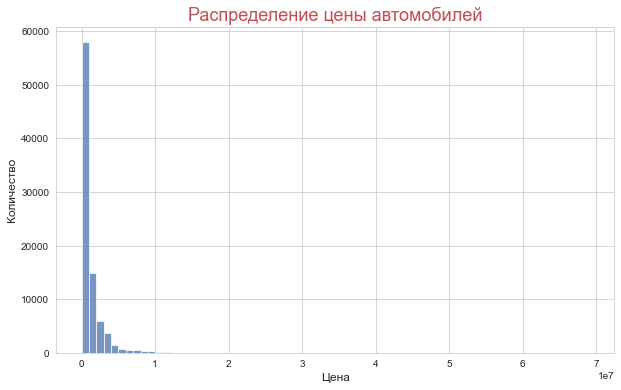

In [178]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['price'], ax=ax, kde=False, color='#4c72b0', binwidth=1000000)
ax.set_xlabel('Цена', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение цены автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Удалим выбросы

In [179]:
mean = np.log(df['price']).mean()
std = np.log(df['price']).std()

# определяем выбросы
lower_bound = np.exp(mean - 3 * std)
upper_bound = np.exp(mean + 3 * std)

print(lower_bound, upper_bound)

33366.1111370894 15111753.829507219


In [180]:
df = df.loc[((df['price'] < upper_bound) & (df['price'] > lower_bound))]

Построем новый график распределения цены

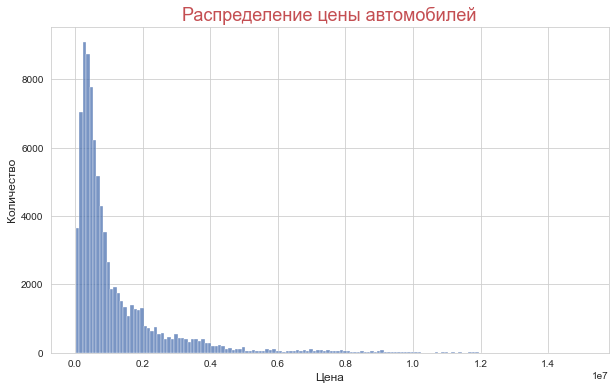

In [181]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['price'], ax=ax, kde=False, color='#4c72b0', binwidth=100000)
ax.set_xlabel('Цена', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение цены автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

In [182]:
df.shape[0]

86841

### Столбец 'start_date'

Данный столбец содержит информацию о публикации объявления автомобилей

In [183]:
df['start_date']

0        2019-10-03T08:09:11Z
2        2020-09-02T14:04:21Z
3        2020-08-23T17:40:09Z
4        2020-09-08T09:22:07Z
5        2020-09-08T09:47:16Z
                 ...         
89373    2020-02-11T09:29:59Z
89374    2020-05-30T18:56:30Z
89375    2020-08-30T14:39:15Z
89376    2019-05-14T15:43:20Z
89377    2020-08-10T11:30:29Z
Name: start_date, Length: 86841, dtype: object

Выведем количество значений NaN

In [184]:
df['start_date'].isna().sum()

0

Переведем столбец в формат datetime

In [185]:
df['start_date'].str[:10]

0        2019-10-03
2        2020-09-02
3        2020-08-23
4        2020-09-08
5        2020-09-08
            ...    
89373    2020-02-11
89374    2020-05-30
89375    2020-08-30
89376    2019-05-14
89377    2020-08-10
Name: start_date, Length: 86841, dtype: object

In [186]:
df['start_date'] = pd.to_datetime(df['start_date'].str[:10])

In [187]:
df['start_date']

0       2019-10-03
2       2020-09-02
3       2020-08-23
4       2020-09-08
5       2020-09-08
           ...    
89373   2020-02-11
89374   2020-05-30
89375   2020-08-30
89376   2019-05-14
89377   2020-08-10
Name: start_date, Length: 86841, dtype: datetime64[ns]

Построем график распределения даты загрузки объявления

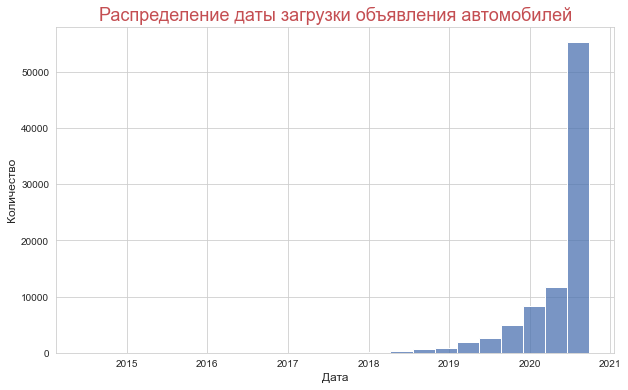

In [188]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['start_date'], ax=ax, kde=False, color='#4c72b0', binwidth=100)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты загрузки объявления автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'model'

Данный столбец содержит информацию о модели автомобилей

In [189]:
df['model']

0           100
2           100
3           100
4           100
5           100
          ...  
89373    RODIUS
89374    RODIUS
89375    STAVIC
89376    STAVIC
89377    STAVIC
Name: model, Length: 86841, dtype: object

Выведем количество значений NaN

In [190]:
df['model'].isna().sum()

0

Выведем количество уникальных значений

In [191]:
df['model'].nunique()

995

# Подготовка данных для построения модели машинного обучения

Выведем общую информацию о столбцах после их обработки

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86841 entries, 0 to 89377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bodyType              86841 non-null  object        
 1   brand                 86841 non-null  object        
 2   color                 86841 non-null  object        
 3   fuelType              86841 non-null  object        
 4   modelDate             86841 non-null  float64       
 5   name                  86841 non-null  object        
 6   numberOfDoors         86841 non-null  float64       
 7   productionDate        86841 non-null  int64         
 8   vehicleConfiguration  86841 non-null  object        
 9   vehicleTransmission   86841 non-null  object        
 10  engineDisplacement    86841 non-null  object        
 11  enginePower           86841 non-null  float64       
 12  description           83678 non-null  object        
 13  mileage         

Выберем столбцы, которые потребуются для обучения модели

In [199]:
x_columns = ['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors', 'productionDate', 
             'vehicleTransmission', 'engineDisplacement', 'enginePower', 'mileage', 'Привод', 'Руль', 
             'Владельцы', 'ПТС', 'start_date', 'description_len', 'equipment']

y_columns = ['price']

In [200]:
X = pd.DataFrame()

Проведем нормализацию для числовых столбцов, а для остальных заменим уникальные значения на числа

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x_columns:
    if df[col].dtypes == 'object':
        parental = {element: index for index, element in enumerate(df[col].unique())}
        X[col] = df[col].replace(parental)
    else:
        X[col] = scaler.fit_transform(df.loc[:,[col]])

Выведем новый датафрейм Х, который содержит новые необходимые столбцы

In [205]:
X

,bodyType,brand,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,mileage,Привод,Руль,Владельцы,ПТС,start_date,description_len,equipment
0,0,0,0,0,-2.759864,-0.815338,-3.085909,0,0,0.103890,2.115905,0,0,1.007349,0,-1.418032,-0.496321,-0.699282
2,1,0,1,0,-3.053977,0.749201,-3.393980,0,1,-0.427215,0.935968,0,0,1.007349,0,0.685843,0.027605,-0.699282
3,0,0,2,0,-3.053977,-0.815338,-3.393980,0,2,-1.070132,1.034296,1,0,1.007349,0,0.623041,-0.626305,-0.699282
4,0,0,0,0,-2.759864,-0.815338,-3.085909,0,3,-0.916391,1.624265,1,0,1.007349,1,0.723524,-0.510004,-0.699282
5,0,0,3,0,-2.759864,-0.815338,-2.777838,0,0,0.103890,0.640984,1,0,1.007349,0,0.723524,-0.506583,-0.699282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89373,11,35,0,1,-0.701073,0.749201,-0.775379,1,21,-0.049851,1.230952,0,0,1.007349,0,-0.595323,-0.513995,-0.699282
89374,11,35,2,1,-0.701073,0.749201,-0.621344,1,21,-0.049851,1.624265,0,0,1.007349,0,0.089222,-0.328711,-0.699282
89375,11,35,0,1,0.622436,0.749201,0.456904,1,16,-0.245521,-0.086644,0,0,-0.809136,0,0.667002,-0.511714,1.642472
89376,11,35,5,1,0.622436,0.749201,0.302868,1,16,-0.245521,-0.499622,0,0,1.007349,0,-2.309824,0.332611,1.642472


Выведем датафрейм у, который содержит столбец, который будем предсказывать

In [206]:
y = df[y_columns]

In [207]:
y

,price
0,200000.0
2,99000.0
3,65000.0
4,100000.0
5,90000.0
...,...
89373,450000.0
89374,485000.0
89375,1090000.0
89376,1180000.0


Выведем тепловую карту коэффициента корреляции Пирсона

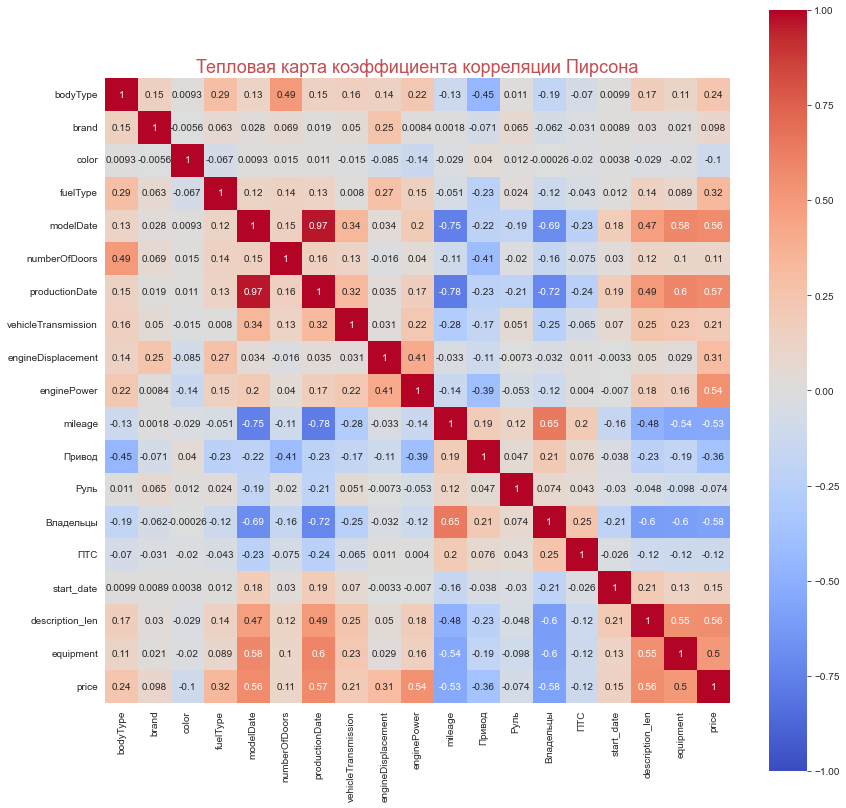

In [208]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14, 14))

corr = pd.concat([X, y], axis=1).corr(method='pearson')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax)
ax.set_title('Тепловая карта коэффициента корреляции Пирсона', fontsize=18, color='#c44e52')

plt.show()

# Построение модели машинного обучения

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучаем модель на трех моделях и считаем среднее по предсказаниям

In [225]:
xgbr = XGBRegressor(learning_rate = 0.1, 
                    max_depth = 10, 
                    n_estimators = 3000)

xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

In [226]:
mse = mean_squared_error(y_test, y_pred_xgbr)
mae = mean_absolute_error(y_test, y_pred_xgbr)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 62773725891.12
MAE: 98604.45


In [212]:
cbr = CatBoostRegressor(iterations=3000, learning_rate=0.1, depth=10)

cbr.fit(X_train, y_train)

y_pred_cbr = cbr.predict(X_test)

0:	learn: 1418217.7675758	total: 188ms	remaining: 9m 24s
1:	learn: 1299260.0301190	total: 218ms	remaining: 5m 26s
2:	learn: 1191002.4918202	total: 252ms	remaining: 4m 11s
3:	learn: 1095123.0113334	total: 281ms	remaining: 3m 30s
4:	learn: 1008235.5321129	total: 321ms	remaining: 3m 12s
5:	learn: 931266.6312370	total: 352ms	remaining: 2m 55s
6:	learn: 863369.5771944	total: 380ms	remaining: 2m 42s
7:	learn: 801905.6682112	total: 410ms	remaining: 2m 33s
8:	learn: 746974.7885912	total: 438ms	remaining: 2m 25s
9:	learn: 700289.4139633	total: 468ms	remaining: 2m 20s
10:	learn: 659384.3792838	total: 497ms	remaining: 2m 14s
11:	learn: 622045.6895994	total: 525ms	remaining: 2m 10s
12:	learn: 588554.0002032	total: 555ms	remaining: 2m 7s
13:	learn: 559128.1749188	total: 588ms	remaining: 2m 5s
14:	learn: 533943.4153521	total: 619ms	remaining: 2m 3s
15:	learn: 511638.9744029	total: 649ms	remaining: 2m
16:	learn: 492220.1197825	total: 680ms	remaining: 1m 59s
17:	learn: 474498.1236419	total: 708ms	rema

147:	learn: 247854.9689296	total: 4.43s	remaining: 1m 25s
148:	learn: 247476.4274088	total: 4.46s	remaining: 1m 25s
149:	learn: 246840.3954510	total: 4.48s	remaining: 1m 25s
150:	learn: 246352.7413036	total: 4.51s	remaining: 1m 25s
151:	learn: 245651.5266325	total: 4.54s	remaining: 1m 25s
152:	learn: 245438.3522436	total: 4.57s	remaining: 1m 25s
153:	learn: 244907.2485017	total: 4.6s	remaining: 1m 25s
154:	learn: 244387.4594481	total: 4.63s	remaining: 1m 25s
155:	learn: 243975.8282487	total: 4.67s	remaining: 1m 25s
156:	learn: 243550.5164313	total: 4.69s	remaining: 1m 24s
157:	learn: 242872.6253782	total: 4.72s	remaining: 1m 24s
158:	learn: 242239.5876223	total: 4.75s	remaining: 1m 24s
159:	learn: 242018.4570137	total: 4.78s	remaining: 1m 24s
160:	learn: 241561.4377597	total: 4.81s	remaining: 1m 24s
161:	learn: 241306.7136169	total: 4.84s	remaining: 1m 24s
162:	learn: 240736.5038167	total: 4.88s	remaining: 1m 24s
163:	learn: 240357.2222720	total: 4.9s	remaining: 1m 24s
164:	learn: 2398

292:	learn: 199641.9974868	total: 8.58s	remaining: 1m 19s
293:	learn: 199477.6122102	total: 8.61s	remaining: 1m 19s
294:	learn: 199267.9853734	total: 8.64s	remaining: 1m 19s
295:	learn: 199183.6623568	total: 8.67s	remaining: 1m 19s
296:	learn: 199072.5939593	total: 8.7s	remaining: 1m 19s
297:	learn: 198857.4861130	total: 8.73s	remaining: 1m 19s
298:	learn: 198678.1714069	total: 8.75s	remaining: 1m 19s
299:	learn: 198464.4954316	total: 8.79s	remaining: 1m 19s
300:	learn: 198302.4496991	total: 8.82s	remaining: 1m 19s
301:	learn: 197986.3395673	total: 8.85s	remaining: 1m 19s
302:	learn: 197854.1224375	total: 8.88s	remaining: 1m 19s
303:	learn: 197597.5150519	total: 8.91s	remaining: 1m 19s
304:	learn: 197351.2719042	total: 8.94s	remaining: 1m 18s
305:	learn: 197240.6241796	total: 8.97s	remaining: 1m 18s
306:	learn: 197157.0380795	total: 9s	remaining: 1m 18s
307:	learn: 197069.8727133	total: 9.03s	remaining: 1m 18s
308:	learn: 196868.0589007	total: 9.05s	remaining: 1m 18s
309:	learn: 196552

437:	learn: 173981.3050105	total: 12.7s	remaining: 1m 14s
438:	learn: 173864.7501523	total: 12.7s	remaining: 1m 14s
439:	learn: 173760.7625959	total: 12.8s	remaining: 1m 14s
440:	learn: 173688.4684677	total: 12.8s	remaining: 1m 14s
441:	learn: 173573.3944549	total: 12.8s	remaining: 1m 14s
442:	learn: 173146.3661423	total: 12.9s	remaining: 1m 14s
443:	learn: 172975.2965104	total: 12.9s	remaining: 1m 14s
444:	learn: 172831.2341208	total: 12.9s	remaining: 1m 14s
445:	learn: 172624.3912756	total: 13s	remaining: 1m 14s
446:	learn: 172420.7666307	total: 13s	remaining: 1m 14s
447:	learn: 172311.1638871	total: 13s	remaining: 1m 14s
448:	learn: 172188.8618780	total: 13.1s	remaining: 1m 14s
449:	learn: 172093.2680705	total: 13.1s	remaining: 1m 14s
450:	learn: 171977.9316325	total: 13.1s	remaining: 1m 14s
451:	learn: 171748.0628398	total: 13.1s	remaining: 1m 14s
452:	learn: 171539.1742051	total: 13.2s	remaining: 1m 14s
453:	learn: 171454.3000356	total: 13.2s	remaining: 1m 13s
454:	learn: 171344.8

582:	learn: 156584.6904557	total: 17.1s	remaining: 1m 11s
583:	learn: 156432.9931432	total: 17.2s	remaining: 1m 11s
584:	learn: 156215.1837231	total: 17.2s	remaining: 1m 11s
585:	learn: 156135.1381578	total: 17.2s	remaining: 1m 10s
586:	learn: 155896.7969635	total: 17.3s	remaining: 1m 10s
587:	learn: 155849.0048321	total: 17.3s	remaining: 1m 10s
588:	learn: 155689.6314699	total: 17.3s	remaining: 1m 10s
589:	learn: 155625.7642134	total: 17.3s	remaining: 1m 10s
590:	learn: 155507.3843883	total: 17.4s	remaining: 1m 10s
591:	learn: 155419.7707358	total: 17.4s	remaining: 1m 10s
592:	learn: 155274.4802727	total: 17.4s	remaining: 1m 10s
593:	learn: 155114.3275866	total: 17.5s	remaining: 1m 10s
594:	learn: 154925.4136361	total: 17.5s	remaining: 1m 10s
595:	learn: 154831.6918387	total: 17.5s	remaining: 1m 10s
596:	learn: 154800.2911109	total: 17.6s	remaining: 1m 10s
597:	learn: 154659.9203889	total: 17.6s	remaining: 1m 10s
598:	learn: 154570.3609525	total: 17.6s	remaining: 1m 10s
599:	learn: 15

733:	learn: 142485.1277664	total: 21.6s	remaining: 1m 6s
734:	learn: 142428.0424280	total: 21.6s	remaining: 1m 6s
735:	learn: 142240.3911556	total: 21.6s	remaining: 1m 6s
736:	learn: 142114.0905112	total: 21.7s	remaining: 1m 6s
737:	learn: 141982.4523525	total: 21.7s	remaining: 1m 6s
738:	learn: 141892.9010562	total: 21.7s	remaining: 1m 6s
739:	learn: 141816.0733979	total: 21.7s	remaining: 1m 6s
740:	learn: 141710.2397982	total: 21.8s	remaining: 1m 6s
741:	learn: 141633.8813771	total: 21.8s	remaining: 1m 6s
742:	learn: 141572.0544300	total: 21.8s	remaining: 1m 6s
743:	learn: 141524.4681224	total: 21.9s	remaining: 1m 6s
744:	learn: 141482.0495674	total: 21.9s	remaining: 1m 6s
745:	learn: 141446.1454695	total: 21.9s	remaining: 1m 6s
746:	learn: 141361.3933726	total: 21.9s	remaining: 1m 6s
747:	learn: 141319.0344583	total: 22s	remaining: 1m 6s
748:	learn: 141136.8077968	total: 22s	remaining: 1m 6s
749:	learn: 141084.3686856	total: 22s	remaining: 1m 6s
750:	learn: 140897.7152553	total: 22.

880:	learn: 132808.6492560	total: 25.8s	remaining: 1m 2s
881:	learn: 132761.9052246	total: 25.8s	remaining: 1m 2s
882:	learn: 132701.4310411	total: 25.9s	remaining: 1m 2s
883:	learn: 132640.3790132	total: 25.9s	remaining: 1m 1s
884:	learn: 132597.8698029	total: 25.9s	remaining: 1m 1s
885:	learn: 132552.6812613	total: 26s	remaining: 1m 1s
886:	learn: 132497.0688919	total: 26s	remaining: 1m 1s
887:	learn: 132443.4088686	total: 26s	remaining: 1m 1s
888:	learn: 132388.5100706	total: 26s	remaining: 1m 1s
889:	learn: 132285.6445791	total: 26.1s	remaining: 1m 1s
890:	learn: 132241.6432999	total: 26.1s	remaining: 1m 1s
891:	learn: 132188.9312399	total: 26.1s	remaining: 1m 1s
892:	learn: 132105.9672050	total: 26.1s	remaining: 1m 1s
893:	learn: 132032.5581959	total: 26.2s	remaining: 1m 1s
894:	learn: 131970.8060827	total: 26.2s	remaining: 1m 1s
895:	learn: 131931.0211486	total: 26.2s	remaining: 1m 1s
896:	learn: 131804.7373500	total: 26.3s	remaining: 1m 1s
897:	learn: 131679.1730952	total: 26.3s

1026:	learn: 124048.3414299	total: 30s	remaining: 57.6s
1027:	learn: 123981.9849074	total: 30s	remaining: 57.6s
1028:	learn: 123902.4341551	total: 30.1s	remaining: 57.6s
1029:	learn: 123854.5004339	total: 30.1s	remaining: 57.5s
1030:	learn: 123776.4989667	total: 30.1s	remaining: 57.5s
1031:	learn: 123737.2859052	total: 30.1s	remaining: 57.5s
1032:	learn: 123658.4478983	total: 30.2s	remaining: 57.5s
1033:	learn: 123572.8159072	total: 30.2s	remaining: 57.4s
1034:	learn: 123528.6423415	total: 30.2s	remaining: 57.4s
1035:	learn: 123493.2944834	total: 30.3s	remaining: 57.4s
1036:	learn: 123425.5597826	total: 30.3s	remaining: 57.4s
1037:	learn: 123363.7008117	total: 30.3s	remaining: 57.3s
1038:	learn: 123323.8640689	total: 30.4s	remaining: 57.3s
1039:	learn: 123271.3435783	total: 30.4s	remaining: 57.3s
1040:	learn: 123232.2371767	total: 30.4s	remaining: 57.2s
1041:	learn: 123205.1343264	total: 30.5s	remaining: 57.2s
1042:	learn: 123159.7881560	total: 30.5s	remaining: 57.2s
1043:	learn: 12310

1169:	learn: 116943.0328177	total: 34.2s	remaining: 53.6s
1170:	learn: 116879.5921622	total: 34.3s	remaining: 53.5s
1171:	learn: 116841.4900537	total: 34.3s	remaining: 53.5s
1172:	learn: 116801.9579107	total: 34.3s	remaining: 53.5s
1173:	learn: 116719.0514797	total: 34.4s	remaining: 53.4s
1174:	learn: 116685.1052634	total: 34.4s	remaining: 53.4s
1175:	learn: 116618.1251297	total: 34.4s	remaining: 53.4s
1176:	learn: 116547.7564602	total: 34.4s	remaining: 53.3s
1177:	learn: 116492.9361497	total: 34.5s	remaining: 53.3s
1178:	learn: 116436.8264696	total: 34.5s	remaining: 53.3s
1179:	learn: 116358.2695084	total: 34.5s	remaining: 53.3s
1180:	learn: 116330.8001690	total: 34.6s	remaining: 53.2s
1181:	learn: 116296.3230251	total: 34.6s	remaining: 53.2s
1182:	learn: 116263.4072540	total: 34.6s	remaining: 53.2s
1183:	learn: 116200.8281601	total: 34.6s	remaining: 53.1s
1184:	learn: 116189.0947800	total: 34.7s	remaining: 53.1s
1185:	learn: 116172.3856288	total: 34.7s	remaining: 53.1s
1186:	learn: 1

1317:	learn: 110526.7348449	total: 38.5s	remaining: 49.1s
1318:	learn: 110499.0862850	total: 38.5s	remaining: 49.1s
1319:	learn: 110444.0364439	total: 38.5s	remaining: 49.1s
1320:	learn: 110383.9757136	total: 38.6s	remaining: 49s
1321:	learn: 110366.7169520	total: 38.6s	remaining: 49s
1322:	learn: 110340.1070545	total: 38.6s	remaining: 49s
1323:	learn: 110310.6105133	total: 38.7s	remaining: 48.9s
1324:	learn: 110264.0792952	total: 38.7s	remaining: 48.9s
1325:	learn: 110223.8135487	total: 38.7s	remaining: 48.9s
1326:	learn: 110188.4247724	total: 38.8s	remaining: 48.9s
1327:	learn: 110121.8418220	total: 38.8s	remaining: 48.8s
1328:	learn: 110097.5530347	total: 38.8s	remaining: 48.8s
1329:	learn: 110071.6758844	total: 38.8s	remaining: 48.8s
1330:	learn: 110046.6441684	total: 38.9s	remaining: 48.7s
1331:	learn: 109994.4922558	total: 38.9s	remaining: 48.7s
1332:	learn: 109944.7577747	total: 38.9s	remaining: 48.7s
1333:	learn: 109906.0001953	total: 38.9s	remaining: 48.6s
1334:	learn: 109870.

1462:	learn: 105426.3372392	total: 42.7s	remaining: 44.8s
1463:	learn: 105407.9675224	total: 42.7s	remaining: 44.8s
1464:	learn: 105336.0096308	total: 42.7s	remaining: 44.8s
1465:	learn: 105291.1886922	total: 42.7s	remaining: 44.7s
1466:	learn: 105253.3698458	total: 42.8s	remaining: 44.7s
1467:	learn: 105227.1413605	total: 42.8s	remaining: 44.7s
1468:	learn: 105186.5800564	total: 42.8s	remaining: 44.6s
1469:	learn: 105162.0044634	total: 42.9s	remaining: 44.6s
1470:	learn: 105121.0917714	total: 42.9s	remaining: 44.6s
1471:	learn: 105091.6773867	total: 42.9s	remaining: 44.5s
1472:	learn: 105072.0992579	total: 42.9s	remaining: 44.5s
1473:	learn: 105033.9923519	total: 43s	remaining: 44.5s
1474:	learn: 105022.7120199	total: 43s	remaining: 44.4s
1475:	learn: 105001.6879892	total: 43s	remaining: 44.4s
1476:	learn: 104956.4481746	total: 43s	remaining: 44.4s
1477:	learn: 104924.2840129	total: 43.1s	remaining: 44.4s
1478:	learn: 104885.1869412	total: 43.1s	remaining: 44.3s
1479:	learn: 104828.44

1611:	learn: 100588.9050201	total: 47s	remaining: 40.4s
1612:	learn: 100570.4230516	total: 47s	remaining: 40.4s
1613:	learn: 100543.6391533	total: 47s	remaining: 40.4s
1614:	learn: 100515.4116680	total: 47.1s	remaining: 40.4s
1615:	learn: 100498.5186295	total: 47.1s	remaining: 40.3s
1616:	learn: 100470.2090697	total: 47.1s	remaining: 40.3s
1617:	learn: 100442.8973627	total: 47.1s	remaining: 40.3s
1618:	learn: 100414.7816615	total: 47.2s	remaining: 40.2s
1619:	learn: 100389.1618005	total: 47.2s	remaining: 40.2s
1620:	learn: 100376.5013176	total: 47.2s	remaining: 40.2s
1621:	learn: 100349.7815104	total: 47.3s	remaining: 40.2s
1622:	learn: 100335.8156197	total: 47.3s	remaining: 40.1s
1623:	learn: 100292.0174705	total: 47.3s	remaining: 40.1s
1624:	learn: 100262.5248793	total: 47.4s	remaining: 40.1s
1625:	learn: 100239.5445743	total: 47.4s	remaining: 40.1s
1626:	learn: 100224.7582862	total: 47.4s	remaining: 40s
1627:	learn: 100193.3919891	total: 47.5s	remaining: 40s
1628:	learn: 100137.0204

1762:	learn: 96192.6909315	total: 51.4s	remaining: 36.1s
1763:	learn: 96169.5857148	total: 51.4s	remaining: 36s
1764:	learn: 96151.6489705	total: 51.5s	remaining: 36s
1765:	learn: 96108.4604824	total: 51.5s	remaining: 36s
1766:	learn: 96082.0776985	total: 51.5s	remaining: 36s
1767:	learn: 96044.7681754	total: 51.6s	remaining: 35.9s
1768:	learn: 96016.2310591	total: 51.6s	remaining: 35.9s
1769:	learn: 95994.2688872	total: 51.6s	remaining: 35.9s
1770:	learn: 95952.8410600	total: 51.6s	remaining: 35.8s
1771:	learn: 95916.8530165	total: 51.7s	remaining: 35.8s
1772:	learn: 95898.6784972	total: 51.7s	remaining: 35.8s
1773:	learn: 95881.2106367	total: 51.7s	remaining: 35.7s
1774:	learn: 95868.5652222	total: 51.7s	remaining: 35.7s
1775:	learn: 95836.7396761	total: 51.8s	remaining: 35.7s
1776:	learn: 95824.6266818	total: 51.8s	remaining: 35.6s
1777:	learn: 95799.3663821	total: 51.8s	remaining: 35.6s
1778:	learn: 95771.8533809	total: 51.9s	remaining: 35.6s
1779:	learn: 95754.6465535	total: 51.9s

1912:	learn: 92438.8310515	total: 55.7s	remaining: 31.7s
1913:	learn: 92432.0680824	total: 55.7s	remaining: 31.6s
1914:	learn: 92401.0016183	total: 55.8s	remaining: 31.6s
1915:	learn: 92378.9178679	total: 55.8s	remaining: 31.6s
1916:	learn: 92366.5766230	total: 55.8s	remaining: 31.5s
1917:	learn: 92321.7527408	total: 55.9s	remaining: 31.5s
1918:	learn: 92308.3826808	total: 55.9s	remaining: 31.5s
1919:	learn: 92282.9804285	total: 55.9s	remaining: 31.4s
1920:	learn: 92255.2243322	total: 55.9s	remaining: 31.4s
1921:	learn: 92227.1893985	total: 56s	remaining: 31.4s
1922:	learn: 92195.7068909	total: 56s	remaining: 31.4s
1923:	learn: 92170.6482685	total: 56s	remaining: 31.3s
1924:	learn: 92155.6680966	total: 56.1s	remaining: 31.3s
1925:	learn: 92132.7703144	total: 56.1s	remaining: 31.3s
1926:	learn: 92076.9559030	total: 56.1s	remaining: 31.2s
1927:	learn: 92055.8199709	total: 56.1s	remaining: 31.2s
1928:	learn: 92043.1437872	total: 56.2s	remaining: 31.2s
1929:	learn: 92010.0949740	total: 56.

2059:	learn: 88895.8633468	total: 59.9s	remaining: 27.3s
2060:	learn: 88879.5992919	total: 60s	remaining: 27.3s
2061:	learn: 88849.2339108	total: 60s	remaining: 27.3s
2062:	learn: 88804.5411370	total: 1m	remaining: 27.3s
2063:	learn: 88782.1196483	total: 1m	remaining: 27.2s
2064:	learn: 88770.9564790	total: 1m	remaining: 27.2s
2065:	learn: 88758.2015881	total: 1m	remaining: 27.2s
2066:	learn: 88745.2954506	total: 1m	remaining: 27.1s
2067:	learn: 88732.0053019	total: 1m	remaining: 27.1s
2068:	learn: 88712.6408676	total: 1m	remaining: 27.1s
2069:	learn: 88696.9088265	total: 1m	remaining: 27.1s
2070:	learn: 88680.3145634	total: 1m	remaining: 27s
2071:	learn: 88667.9118065	total: 1m	remaining: 27s
2072:	learn: 88651.0480890	total: 1m	remaining: 27s
2073:	learn: 88579.8347873	total: 1m	remaining: 26.9s
2074:	learn: 88559.7193148	total: 1m	remaining: 26.9s
2075:	learn: 88529.7389787	total: 1m	remaining: 26.9s
2076:	learn: 88518.6968943	total: 1m	remaining: 26.9s
2077:	learn: 88506.8689858	to

2209:	learn: 85660.6430745	total: 1m 4s	remaining: 23s
2210:	learn: 85645.0562906	total: 1m 4s	remaining: 23s
2211:	learn: 85614.8787789	total: 1m 4s	remaining: 23s
2212:	learn: 85600.9539290	total: 1m 4s	remaining: 22.9s
2213:	learn: 85578.0320323	total: 1m 4s	remaining: 22.9s
2214:	learn: 85554.7946313	total: 1m 4s	remaining: 22.9s
2215:	learn: 85533.7726536	total: 1m 4s	remaining: 22.8s
2216:	learn: 85523.3552646	total: 1m 4s	remaining: 22.8s
2217:	learn: 85507.9446870	total: 1m 4s	remaining: 22.8s
2218:	learn: 85485.2605625	total: 1m 4s	remaining: 22.8s
2219:	learn: 85469.1799428	total: 1m 4s	remaining: 22.7s
2220:	learn: 85446.3901164	total: 1m 4s	remaining: 22.7s
2221:	learn: 85426.7120797	total: 1m 4s	remaining: 22.7s
2222:	learn: 85407.4085528	total: 1m 4s	remaining: 22.6s
2223:	learn: 85402.0291579	total: 1m 4s	remaining: 22.6s
2224:	learn: 85389.7153792	total: 1m 4s	remaining: 22.6s
2225:	learn: 85370.7618511	total: 1m 4s	remaining: 22.6s
2226:	learn: 85352.0890937	total: 1m 

2356:	learn: 82925.3144907	total: 1m 8s	remaining: 18.7s
2357:	learn: 82909.3511855	total: 1m 8s	remaining: 18.7s
2358:	learn: 82895.8298321	total: 1m 8s	remaining: 18.7s
2359:	learn: 82878.2242268	total: 1m 8s	remaining: 18.6s
2360:	learn: 82853.5598041	total: 1m 8s	remaining: 18.6s
2361:	learn: 82838.1724175	total: 1m 8s	remaining: 18.6s
2362:	learn: 82822.8158872	total: 1m 8s	remaining: 18.5s
2363:	learn: 82808.4980228	total: 1m 8s	remaining: 18.5s
2364:	learn: 82784.0904815	total: 1m 8s	remaining: 18.5s
2365:	learn: 82767.6858318	total: 1m 8s	remaining: 18.5s
2366:	learn: 82750.3292276	total: 1m 8s	remaining: 18.4s
2367:	learn: 82729.1149818	total: 1m 8s	remaining: 18.4s
2368:	learn: 82717.5041494	total: 1m 8s	remaining: 18.4s
2369:	learn: 82700.8105056	total: 1m 8s	remaining: 18.3s
2370:	learn: 82689.5206451	total: 1m 9s	remaining: 18.3s
2371:	learn: 82681.4758614	total: 1m 9s	remaining: 18.3s
2372:	learn: 82663.7858010	total: 1m 9s	remaining: 18.3s
2373:	learn: 82652.7559595	tota

2504:	learn: 80399.5580731	total: 1m 12s	remaining: 14.4s
2505:	learn: 80386.4401152	total: 1m 12s	remaining: 14.4s
2506:	learn: 80367.2379049	total: 1m 12s	remaining: 14.3s
2507:	learn: 80361.8407669	total: 1m 12s	remaining: 14.3s
2508:	learn: 80349.0974875	total: 1m 12s	remaining: 14.3s
2509:	learn: 80337.9681385	total: 1m 13s	remaining: 14.3s
2510:	learn: 80315.2769937	total: 1m 13s	remaining: 14.2s
2511:	learn: 80294.2305400	total: 1m 13s	remaining: 14.2s
2512:	learn: 80279.9876232	total: 1m 13s	remaining: 14.2s
2513:	learn: 80267.4687299	total: 1m 13s	remaining: 14.1s
2514:	learn: 80261.2578745	total: 1m 13s	remaining: 14.1s
2515:	learn: 80246.0550174	total: 1m 13s	remaining: 14.1s
2516:	learn: 80226.7485674	total: 1m 13s	remaining: 14.1s
2517:	learn: 80192.2579047	total: 1m 13s	remaining: 14s
2518:	learn: 80185.3282253	total: 1m 13s	remaining: 14s
2519:	learn: 80163.8900399	total: 1m 13s	remaining: 14s
2520:	learn: 80154.6201489	total: 1m 13s	remaining: 13.9s
2521:	learn: 80144.2

2652:	learn: 78056.8525909	total: 1m 17s	remaining: 10.1s
2653:	learn: 78046.9686116	total: 1m 17s	remaining: 10.1s
2654:	learn: 78028.4078636	total: 1m 17s	remaining: 10s
2655:	learn: 78018.4434501	total: 1m 17s	remaining: 10s
2656:	learn: 78008.9862409	total: 1m 17s	remaining: 9.97s
2657:	learn: 77991.1403779	total: 1m 17s	remaining: 9.94s
2658:	learn: 77984.1490355	total: 1m 17s	remaining: 9.91s
2659:	learn: 77971.3288598	total: 1m 17s	remaining: 9.88s
2660:	learn: 77954.8446700	total: 1m 17s	remaining: 9.85s
2661:	learn: 77938.0049788	total: 1m 17s	remaining: 9.82s
2662:	learn: 77924.9677907	total: 1m 17s	remaining: 9.79s
2663:	learn: 77920.4145856	total: 1m 17s	remaining: 9.77s
2664:	learn: 77907.5898160	total: 1m 17s	remaining: 9.74s
2665:	learn: 77883.0989692	total: 1m 17s	remaining: 9.71s
2666:	learn: 77875.1255354	total: 1m 17s	remaining: 9.68s
2667:	learn: 77856.7869167	total: 1m 17s	remaining: 9.65s
2668:	learn: 77848.7080556	total: 1m 17s	remaining: 9.62s
2669:	learn: 77835

2801:	learn: 75914.1508470	total: 1m 21s	remaining: 5.76s
2802:	learn: 75895.5820213	total: 1m 21s	remaining: 5.73s
2803:	learn: 75883.8312262	total: 1m 21s	remaining: 5.7s
2804:	learn: 75864.7717275	total: 1m 21s	remaining: 5.67s
2805:	learn: 75853.4959706	total: 1m 21s	remaining: 5.64s
2806:	learn: 75847.0796159	total: 1m 21s	remaining: 5.61s
2807:	learn: 75834.1506159	total: 1m 21s	remaining: 5.58s
2808:	learn: 75815.7814636	total: 1m 21s	remaining: 5.55s
2809:	learn: 75797.9043645	total: 1m 21s	remaining: 5.53s
2810:	learn: 75783.9755651	total: 1m 21s	remaining: 5.5s
2811:	learn: 75770.5315589	total: 1m 21s	remaining: 5.47s
2812:	learn: 75761.6837559	total: 1m 21s	remaining: 5.44s
2813:	learn: 75745.6919940	total: 1m 21s	remaining: 5.41s
2814:	learn: 75723.8856768	total: 1m 21s	remaining: 5.38s
2815:	learn: 75709.8202012	total: 1m 21s	remaining: 5.35s
2816:	learn: 75697.2693563	total: 1m 21s	remaining: 5.32s
2817:	learn: 75687.3159199	total: 1m 21s	remaining: 5.29s
2818:	learn: 756

2944:	learn: 74008.0267532	total: 1m 25s	remaining: 1.6s
2945:	learn: 73992.8362193	total: 1m 25s	remaining: 1.57s
2946:	learn: 73973.6460625	total: 1m 25s	remaining: 1.54s
2947:	learn: 73968.1663968	total: 1m 25s	remaining: 1.51s
2948:	learn: 73949.7375380	total: 1m 25s	remaining: 1.48s
2949:	learn: 73941.8786070	total: 1m 25s	remaining: 1.45s
2950:	learn: 73931.6825296	total: 1m 25s	remaining: 1.42s
2951:	learn: 73921.3258054	total: 1m 25s	remaining: 1.4s
2952:	learn: 73916.6112523	total: 1m 25s	remaining: 1.37s
2953:	learn: 73898.6898121	total: 1m 25s	remaining: 1.34s
2954:	learn: 73890.2445334	total: 1m 25s	remaining: 1.31s
2955:	learn: 73874.6435781	total: 1m 25s	remaining: 1.28s
2956:	learn: 73861.9330298	total: 1m 25s	remaining: 1.25s
2957:	learn: 73851.8797009	total: 1m 26s	remaining: 1.22s
2958:	learn: 73838.0954204	total: 1m 26s	remaining: 1.19s
2959:	learn: 73823.2944314	total: 1m 26s	remaining: 1.16s
2960:	learn: 73806.4782301	total: 1m 26s	remaining: 1.13s
2961:	learn: 737

In [213]:
mse = mean_squared_error(y_test, y_pred_cbr)
mae = mean_absolute_error(y_test, y_pred_cbr)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 59129976678.12
MAE: 100904.62


In [215]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression',
                     learning_rate=0.1, 
                     max_depth=10,
                     n_estimators=3000)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

In [216]:
mse = mean_squared_error(y_test, y_pred_lgbm)
mae = mean_absolute_error(y_test, y_pred_lgbm)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 63146840766.10
MAE: 104982.68


Считаем среднее трех моделей

In [227]:
y_pred_mean = (y_pred_xgbr + y_pred_cbr + y_pred_lgbm) / 3

In [235]:
mse = mean_squared_error(y_test, y_pred_mean)
mae = mean_absolute_error(y_test, y_pred_mean)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 57271834126.14
MAE: 96606.51
